In [3]:
# import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load dataset
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes_data = pd.read_csv("./data/diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
#split dataset in features and target variable
X = diabetes_data.drop('Outcome', axis=1) # Features
# X = diabetes_data[['Pregnancies', 'Glucose']]
y = diabetes_data['Outcome'] # Target variable

In [17]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1000)

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [10]:
#predicting the output for out test set
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [11]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
554,1,84,64,23,115,36.9,0.471,28
319,6,194,78,0,0,23.5,0.129,59
594,6,123,72,45,230,33.6,0.733,34
6,3,78,50,32,88,31.0,0.248,26


In [16]:
# import the metrics class to create confusion matrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

NameError: name 'y_pred' is not defined

Text(0.5, 427.9555555555555, 'Predicted label')

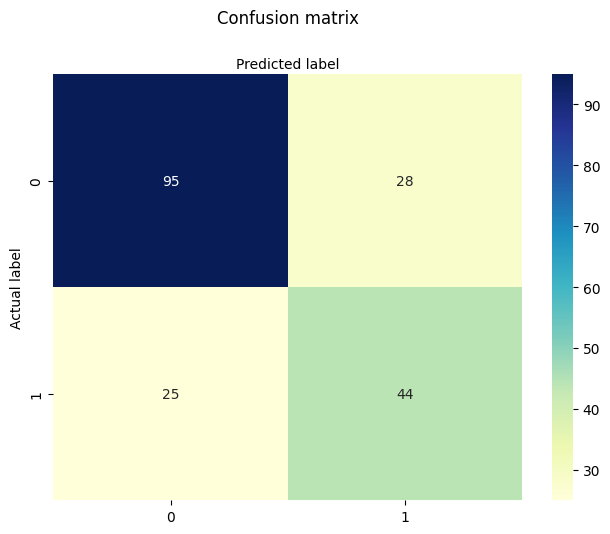

In [13]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7239583333333334
Precision: 0.6111111111111112
Recall: 0.6376811594202898


In [15]:
# print(precision_recall_fscore_support(y_test, y_pred))

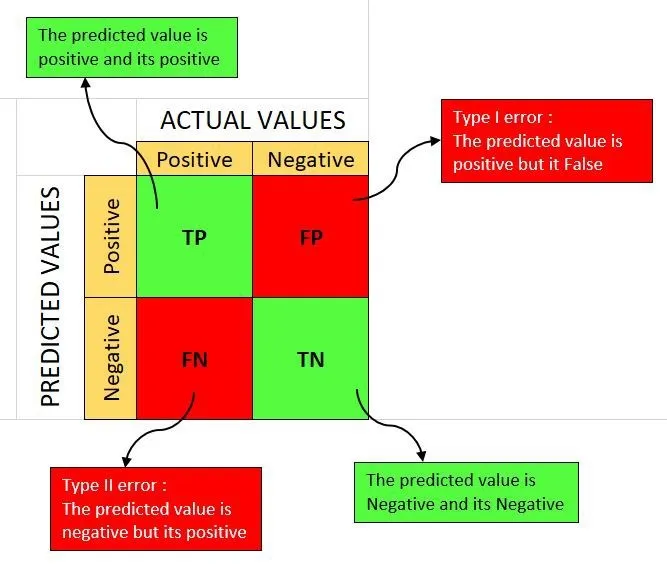!

**Precision:**
How much were correctly classified as positive out of all positives.
Precision = TP/TP+FP

A high precision indicates that the model is making few false positive predictions.

`Precision tells you: “When I say someone has the disease, how often am I right?”`

------------------------------

**Recall (Sensitivity):**
Recall and sensitivity are one and the same.
`Recall = TP / FN+TP`
Recall indicates how many of the actual positive instances the model is able to correctly identify. A high recall indicates that the model is capturing most of the positive instances in the dataset.

`Recall tells you: “Out of all the people who actually have the disease, how many did I correctly identify?”`


------------------------------------
Where are precision and recall used ?
F1-score is the harmonic mean of precision and recall. It provides a single metric that combines both precision and recall, balancing the trade-off between the two. It is calculated as:

F1 score = 2 * (precision * recall)/ (precision + recall)

F1-score combines precision and recall into a single number to give you an overall measure of a model’s performance. It’s like a balance between being cautious (precision) and being thorough (recall).

F1 score is considered a better indicator of the classifier’s performance than the regular accuracy measure.

------------------------------------

Support refers to the number of actual occurrences of the class in the dataset. It is the number of instances in each class.

Example: If you’re diagnosing a disease, it tells you how many healthy and sick patients you have in your dataset.

## Random Forest Classifier

In [ ]:
#split dataset in features and target variable
X = diabetes_data.drop('Outcome', axis=1) # Features
# X = diabetes_data[['Pregnancies', 'Glucose']]
y = diabetes_data['Outcome'] # Target variable

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(537, 8)

In [18]:
X_test.shape

(231, 8)

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
model_rf.score(X_test, y_test)

0.7532467532467533

# K-Fold Cross Validation

In [5]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [6]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'SkinThickness', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = diabetes_data[feature_cols] # Features
y = diabetes_data.Outcome # Target variable

In [13]:
# from sklearn.preprocessing import StandardScaler
# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.preprocessing import RobustScaler
# Standardize the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X

In [ ]:
X_scaled

In [19]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# Logistic Regression model
model = LogisticRegression(max_iter = 1000)

In [22]:
# Function to perform cross-validation and print classification report
def evaluate_model(cv):
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy for each fold: {scores}")
    print(f"Mean accuracy: {scores.mean()}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [23]:
# 3-fold cross-validation
print("3-Fold Cross-Validation")
kf3 = KFold(n_splits=3, random_state=1, shuffle=True)
evaluate_model(kf3)

# 5-fold cross-validation
print("\n5-Fold Cross-Validation")
kf5 = KFold(n_splits=5, random_state=1, shuffle=True)
evaluate_model(kf5)

# Stratified K-fold cross-validation
print("\nStratified K-Fold Cross-Validation")
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
evaluate_model(skf)

3-Fold Cross-Validation
Accuracy for each fold: [0.77560976 0.81463415 0.74509804]
Mean accuracy: 0.7784473138849036
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154


5-Fold Cross-Validation
Accuracy for each fold: [0.77235772 0.82113821 0.7804878  0.76422764 0.74590164]
Mean accuracy: 0.7768226042916166
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154


Stratified K-Fold Cross-Validation
Accur

### K-Fold Cross-Validation
- **Definition**: K-fold cross-validation splits the dataset into \( k \) equally sized folds. The model is trained on \( k-1 \) folds and tested on the remaining fold. This process is repeated \( k \) times, with each fold used exactly once as the test set.
- **Usage**: It is generally used when the dataset is balanced, meaning the classes are evenly distributed.
- **Advantages**:
  - Simple to implement.
  - Provides a good estimate of model performance.
- **Disadvantages**:
  - If the dataset is imbalanced, some folds may have a disproportionate number of samples from different classes, leading to biased performance estimates.

### Stratified K-Fold Cross-Validation
- **Definition**: Stratified K-fold cross-validation is a variation of K-fold that ensures each fold has the same proportion of class labels as the original dataset. This is particularly useful for imbalanced datasets.
- **Usage**: It is preferred when dealing with classification tasks where the class distribution is imbalanced.
- **Advantages**:
  - Maintains the class distribution across all folds.
  - Provides a more reliable estimate of model performance for imbalanced datasets.
- **Disadvantages**:
  - Slightly more complex to implement compared to standard K-fold.

### Example Scenario
Suppose you have a dataset with 100 samples, where 90 samples belong to class A and 10 samples belong to class B. Using K-fold cross-validation might result in some folds having very few or no samples from class B, leading to unreliable performance estimates. Stratified K-fold ensures that each fold has a representative proportion of both classes, providing a more accurate evaluation.

In summary, **K-fold cross-validation** is suitable for balanced datasets, while **Stratified K-fold cross-validation** is better for imbalanced datasets to ensure each fold is representative of the overall class distribution.